Fetching Datasets

In [65]:
from sklearn.datasets import fetch_openml

In [66]:
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [67]:
x,y = mnist['data'],mnist['target']

In [68]:
x.shape

(70000, 784)

In [69]:
y.shape

(70000,)

In [70]:
%matplotlib inline

In [71]:
import matplotlib

In [72]:
import matplotlib.pyplot as plt

In [73]:
some_digit = x[3601]
some_digit_image = some_digit.reshape(28,28) #lets reshape it plot it

(-0.5, 27.5, 27.5, -0.5)

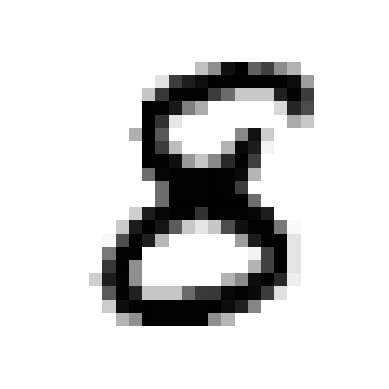

In [74]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

In [75]:
y[3601]

'8'

In [76]:
x_train,x_test = x[:6000],x[6000:]

In [77]:
y_train,y_test = y[:6000],y[6000:]

In [78]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train,y_train = x_train[shuffle_index],y_train[shuffle_index]

**Creating as 2 Detector**

In [79]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 =(y_train==2)
y_test_2 = (y_test==2)

In [80]:
y_train

array([4, 9, 9, ..., 0, 2, 1], dtype=int8)

In [81]:
y_test_2

array([False, False, False, ..., False, False, False])

In [82]:
from sklearn.linear_model import LogisticRegression

In [90]:
clf = LogisticRegression(tol = 0.1)

In [91]:
clf.fit(x_train,y_train_2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [92]:
clf.predict([some_digit])

array([False])

In [93]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf,x_train,y_train,cv=3,scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [96]:
print('Test accuracy : ',a.mean())

Test accuracy :  0.8806666666666666
